# Random Forest

In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split, LearningCurveDisplay
import matplotlib.pyplot as plt

## Cargar los datos procesados

In [2]:
df = pd.read_csv('output.csv')

## Encontrar los Mejores Hiperparametros

Dividir los datos en las variables de entrada y salida

In [3]:
y = df['y']
X = df.drop('y', axis=1)

In [4]:
y

0        False
1        False
2        False
3        False
4        False
         ...  
45206     True
45207     True
45208     True
45209    False
45210    False
Name: y, Length: 45211, dtype: bool

In [5]:
X

,age,default,balance,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,1.606965,False,0.256419,True,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False
1,0.288529,False,-0.437895,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,True,False,False
2,-0.747384,False,-0.446762,True,True,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
3,0.571051,False,0.047205,True,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,-0.747384,False,-0.447091,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,False,-0.176460,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
45207,2.831227,False,0.120447,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
45208,2.925401,False,1.429593,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
45209,1.512791,False,-0.228024,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,True,False,False


In [6]:
ranForest = RandomForestClassifier()

In [10]:
param_grid = {
    'n_estimators' : [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'max_features' : [None, 'sqrt', 'log2'],
    'max_depth' : [2, 4],
    'min_samples_leaf' : [1, 2],
    'bootstrap' : [True, False]
}

print(param_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': [None, 'sqrt', 'log2'], 'max_depth': [2, 4], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [11]:
clf = GridSearchCV(ranForest, param_grid = param_grid, cv = 3, verbose = True, n_jobs = -1)

In [12]:
best_clf = clf.fit(X, y)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


In [13]:
best_clf.best_estimator_

RandomForestClassifier(max_depth=2, n_estimators=200)

In [15]:
print(f'La mejor exactitud: {best_clf.score(X, y):.3f}')

La mejor exactitud: 0.883


## Curva de Aprendizaje

In [16]:
ranForest = RandomForestClassifier(max_depth = 2, n_estimators = 200)

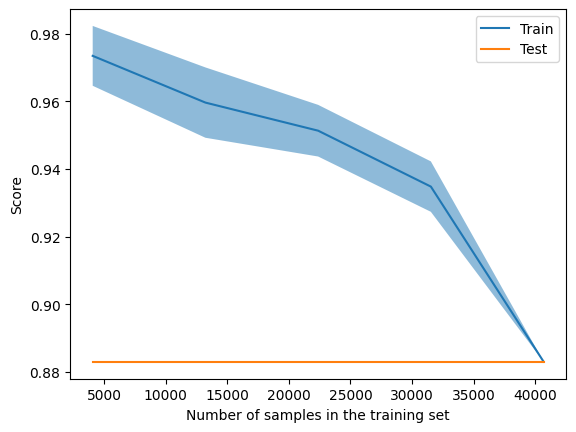

In [17]:
LearningCurveDisplay.from_estimator(ranForest, X, y, cv = 10)

## Diagnostico

La curva de aprendizaje nos dio practicamente igual que nuestro modelo de regresion lineal, esto puede estar sugiriendo que el problema de que nuestra curva de aciertos en el set de validacion este estancado, no se deba a un modelo mas o menos complejo, si no que el problema se encuentre en los datos que estamos usando para entrenar nuestro modelo, datos los cuales, como ya fue mencionado previamente, son muy generales y muy pocos (en cantidad de atributos, no filas), esto puede estar resultando en que nuestros modelos en verdad no esten progresando.

Las recomendaciones para este modelo entonces se mantienen casi iguales a las que se le hicieron al modelo de regresion logistica, el cual es:
*  Recolectar una mayor cantidad de datos, los cuales no dependan de contacto previo con los clientes, como puede ser, cantidad de productos financieros que ha tenido en su vida, estados financieros de personas allegadas a este, etc; esto debido a que debido a lo simple y generales que son nuestros datos finales que escogimos, estos no puedan estar dando un patron (o tal vez puede ser el siguiente punto) muy claro, o no estan dando informacion suficiente para poder realizar una prediccion mas acertada.